# Tanzania Water Wells 🚰 Prediction Model.
*By Muniu Paul ™️*

## 1. BUSINESS UNDERSTANDING.
### Overview.
Tanzania, a developing country with a population of 68.42 million as of January 2024, faces significant challenges in providing clean water to its people. According to a recent United Nations World Water Development Report, around 2 billion people globally lack access to clean and safe drinking water. In Tanzania, the crisis is even more acute: out of its 65 million people, 58 million (88% of the population) lack access to safe water. This severe shortage of clean water exacerbates health issues, economic hardships, and educational disparities across the country.

### Problem Statement.
The aim of this project is to predict the operational status of water wells in Tanzania using data on various features such as the type of pump, the year it was installed, and the management practices. Accurately predicting which water points are functional, which need repairs and which are non-functional will enable more effective maintenance operations and improve access to clean water for Tanzanian communities.

### Objectives.
1. Data Analysis and Preprocessing: Thoroughly analyze and clean the dataset to ensure it is suitable for modeling.
2. Model Development: Train and evaluate multiple classification models to identify the most accurate and precise model for predicting the status of water wells.
3. Model Evaluation: Use accuracy and precision as the primary metrics to evaluate the model's performance. These metrics will help determine how well the model identifies the status of water wells given various factors.
4. Deployment: Deploy the final model to our stakeholders, to aid in making data-driven decisions for maintaining and improving water access in Tanzania.

### Stakeholder: **WaterAid**
*Organization Overview.*

WaterAid is an international non-governmental organization (NGO) based in the United Kingdom. The organization is dedicated exclusively to ensuring equitable access to safe water, sanitation and hygiene education for the world’s poorest communities. WaterAid has a profound impact on improving health, education, and economic opportunities by providing sustainable solutions for water and sanitation.

*Project Mandate.*

WaterAid has tasked us with developing a predictive model to determine the operational status of water wells in Tanzania. This life-changing project aims to optimize the allocation of resources for maintenance and repair, ensuring that more people have access to clean and safe drinking water. By leveraging data-driven insights, WaterAid can enhance its mission of providing essential water services to underserved communities and contribute to global efforts in alleviating water and sanitation crises.

# 2. DATA UNDERSTANDING.
The dataset provided by [Taarifa](https://taarifa.org/) and the [Tanzanian Ministry of Water](https://www.maji.go.tz/) contains extensive information about various water points across Tanzania. Additionally, the features in this dataset are found [here.](https://www.drivendata.org/competitions/7/pump-it-up-data-mining-the-water-table/page/25/)

##### Importing packages/libraries

In [68]:
import pandas as pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import missingno as msno
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')


##### Loading the Dataset

In [69]:
import pandas as pd
data_values = pd.read_csv("Data/wells_data_values.csv")
data_values.info()

# function 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

The dataset consits of a total of 40 Columns and 59400 records. The features include:

`amount_tsh`: Total static head (amount of water available to the waterpoint)

`date_recorded`: The date the row was entered

`funder`: The entity that funded the well

`gps_height`: Altitude of the well

`installer`: Organization that installed the well

`longitude`: GPS coordinate

`latitude`: GPS coordinate

`wpt_name`: Name of the waterpoint, if there is one

`num_private`: Not specified (likely an identifier for private records)

`basin`: Geographic water basin

`subvillage`: Geographic location

`region`: Geographic location

`region_code`: Geographic location (coded)

`district_code`: Geographic location (coded)

`lga`: Local Government Area

`ward`: Geographic location

`population`: Population around the well

`public_meeting`: Boolean indicating if a public meeting was held

`recorded_by`: Group entering this row of data

`scheme_management`: Entity responsible for managing the water scheme

`scheme_name`: Name of the water scheme

`permit`: Boolean indicating if the waterpoint is permitted

`construction_year`: Year the waterpoint was constructed

`extraction_type`: Type of extraction used by the waterpoint

`extraction_type_group`: Group classification of extraction type

`extraction_type_class`: Class classification of extraction type

`management`: How the waterpoint is managed

`management_group`: Group classification of management type

`payment`: Type of payment for water

`payment_type`: Group classification of payment type

`water_quality`: Quality of the water

`quality_group`: Group classification of water quality

`quantity`: Quantity of water

`quantity_group`: Group classification of water quantity

`source`: Source of the water

`source_type`: Group classification of water source

`source_class`: Class classification of water source

`waterpoint_type`: Type of waterpoint

`waterpoint_type_group`: Group classification of waterpoint type



In [70]:
data_labels = pd.read_csv("Data/wells_labels.csv")
data_labels.info()
print("--------------------------------------------")
for index, status_group  in enumerate(data_labels["status_group"].unique() , start=1):
    print(f"{index}.{status_group.upper()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.3+ KB
--------------------------------------------
1.FUNCTIONAL
2.NON FUNCTIONAL
3.FUNCTIONAL NEEDS REPAIR


Target Variable
The target variable is the operational status "`status_group`" of the water point, which has three possible values:

1. `Functional`: The waterpoint is operational, and no repairs are needed.
2. `Non functional`: The waterpoint is not operational.
3. `Functional needs repair`: The waterpoint is operational but requires repairs.


# 3. DATA PREPARATION.
#### (a) Merging.
We will kick-off by merging the two datasets.

In [71]:
# estatic to see both datasets have the same number of rows!
data_labels.shape, data_values.shape

((59400, 2), (59400, 40))

In [72]:
# merging the predictors and the target
wells_data = pd.merge(data_values, data_labels, on = "id", how="outer" )
print(wells_data.shape)
wells_data.sample(3)

(59400, 41)


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
52815,49672,0.0,2013-02-06,World Bank,1690,WORLD BANK,35.182601,-4.205538,Kwa John Daniel,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,other,other,non functional
52933,29419,0.0,2011-04-14,Government Of Tanzania,0,Government,33.059418,-8.581202,Sekondari,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional needs repair
39306,34582,0.0,2011-07-08,Hesawa,0,DWE,31.460338,-1.514525,Kwa Siraji,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,non functional


#### (b)Feature Dropping.

I eliminated features that were redundant or unusable for our models. Many features contained similar information, and some, such as `num_private`, lacked sufficient descriptions for meaningful use. This trimming process helps streamline our dataset and improve model performance.


In [73]:
columns_to_delete = ["id",'num_private', 'wpt_name', 'recorded_by', 'scheme_name', 'public_meeting', 'payment',
                     'extraction_type_group', 'extraction_type', 'management', 'water_quality',
                     'lga', 'ward', 'region_code', 'district_code', 'subvillage', "scheme_name", "scheme_management",
                     "public_meeting",'source', 'source_class', 'longitude', 'latitude', 'quantity_group', 'waterpoint_type']

# Print the columns to delete
wells_data[columns_to_delete].sample(2)

,id,num_private,wpt_name,recorded_by,scheme_name,public_meeting,payment,extraction_type_group,extraction_type,management,...,subvillage,scheme_name,scheme_management,public_meeting,source,source_class,longitude,latitude,quantity_group,waterpoint_type
17540,68866,0,Makarini,GeoData Consultants Ltd,Kidia kilemapunda,False,unknown,gravity,gravity,vwc,...,Makomba,Kidia kilemapunda,VWC,False,spring,groundwater,37.388997,-3.333548,insufficient,communal standpipe
41380,23821,0,Msikitini,GeoData Consultants Ltd,NaN,True,unknown,nira/tanira,nira/tanira,wug,...,Nyasubi Sango,NaN,NaN,True,shallow well,groundwater,32.613658,-3.831971,enough,hand pump


In [74]:
wells_data = wells_data.drop(columns = columns_to_delete)
print(wells_data.shape)
wells_data.sample(2)

(59400, 18)


,amount_tsh,date_recorded,funder,gps_height,installer,basin,region,population,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,waterpoint_type_group,status_group
40670,0.0,2013-01-20,Government Of Tanzania,1363,DWE,Lake Tanganyika,Kigoma,900,True,2001,gravity,user-group,never pay,good,insufficient,river/lake,communal standpipe,functional
35829,0.0,2013-03-30,Government Of Tanzania,1468,DWE,Pangani,Arusha,150,True,2002,gravity,user-group,never pay,good,insufficient,spring,communal standpipe,non functional


In [75]:
# Checking for duplicates
wells_data.duplicated().sum()

9940

##### Handling Missing Values


In [76]:
#function for identifying with missing values
def missing_values(data):
    """
    Identify the missing values and their percentages
    Drop values that have no missing values
    Return only data with missing values
    """
    miss_val = data.isna().sum().sort_values(ascending = False)
    percentage = (data.isna().sum() / len(data)).sort_values(ascending = False)
    missing_values = pd.DataFrame({"Missing Values": miss_val, "In Percentage": (percentage)*100})
    missing_values.drop(missing_values[missing_values["In Percentage"] == 0].index, inplace=True)
    return missing_values

missing_values(wells_data)

,Missing Values,In Percentage
installer,3655,6.153199
funder,3637,6.122896
permit,3056,5.144781




I observed that certain columns in our dataset had a small percentage of missing values. 
Given that the percentage of missing values in these columns is relatively low, I decided to drop the rows containing missing values in these columns. This approach ensures that we do not risk introducing any bias or inaccuracies that could result from improper imputation


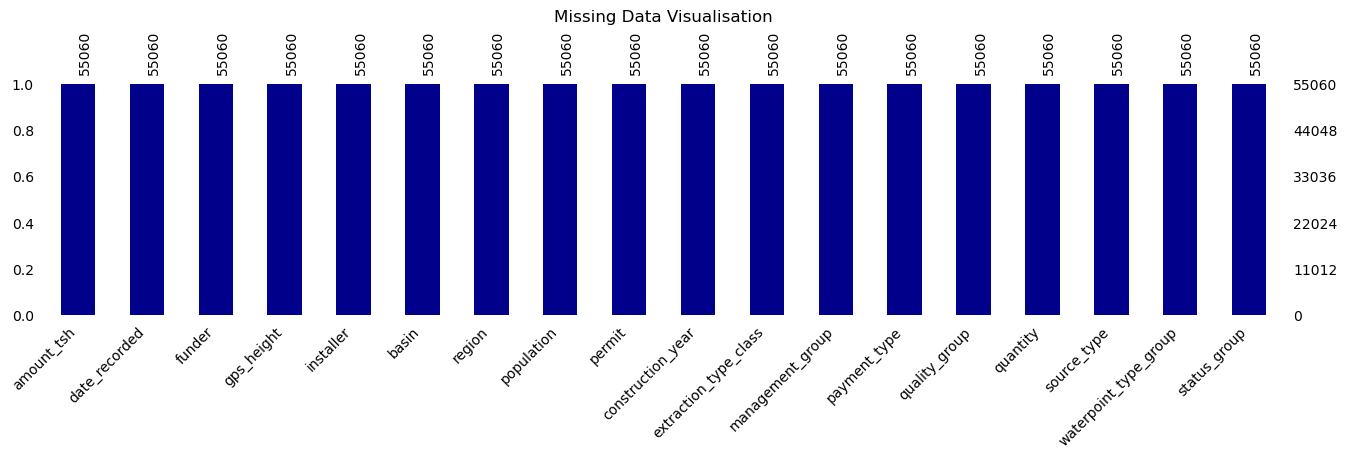

In [77]:
# Dropping rows with missing values in the specified columns
wells_data = wells_data.dropna(subset=['installer', 'funder', 'permit'])

# Visualise to verify any missing data in the DataFrame
msno.bar(wells_data, figsize=(16, 3), fontsize=(10), color='darkblue')
plt.title("Missing Data Visualisation")
plt.xticks(rotation = 90, fontsize=10);

In [78]:
wells_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55060 entries, 0 to 59399
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             55060 non-null  float64
 1   date_recorded          55060 non-null  object 
 2   funder                 55060 non-null  object 
 3   gps_height             55060 non-null  int64  
 4   installer              55060 non-null  object 
 5   basin                  55060 non-null  object 
 6   region                 55060 non-null  object 
 7   population             55060 non-null  int64  
 8   permit                 55060 non-null  object 
 9   construction_year      55060 non-null  int64  
 10  extraction_type_class  55060 non-null  object 
 11  management_group       55060 non-null  object 
 12  payment_type           55060 non-null  object 
 13  quality_group          55060 non-null  object 
 14  quantity               55060 non-null  object 
 15  source_


#### Feature Engineering: `Age of Waterpoint.`

To enhance the dataset, we created a new feature called `age_of_waterpoint`. This feature represents the age of the waterpoint at the time the data was recorded. It is calculated by subtracting the `construction_year` from the year extracted from the `date_recorded`.
During our data analysis, we found that the `construction_year` column contains many zero values, which are unrealistic and likely indicate missing data. To address this, we replaced the zero values with the median of the non-zero construction years. The median is chosen because it is robust to outliers and represents a typical value in the dataset.



In [79]:
# Convert 'date_recorded' to datetime data type
wells_data['date_recorded'] = pd.to_datetime(wells_data['date_recorded'])

# view column "construction_year"
wells_data["construction_year"].unique()


array([1999, 2010, 2009, 1986,    0, 2011, 1987, 1991, 1978, 1992, 2008,
       1974, 2000, 2002, 2004, 1972, 2003, 2007, 1973, 1985, 1995, 2006,
       1962, 2005, 1997, 1970, 1996, 1977, 1983, 2012, 1984, 1982, 1976,
       1988, 1989, 1975, 1960, 1990, 1961, 1998, 1963, 1971, 1994, 1968,
       1980, 1993, 2001, 1979, 1967, 1969, 1981, 2013, 1964, 1966, 1965],
      dtype=int64)

In [80]:
# Calculate the median of non-zero construction years
median_construction_year = wells_data[wells_data['construction_year'] != 0]['construction_year'].median()

# Replace zero values with the median
wells_data['construction_year'] = wells_data['construction_year'].replace(0, median_construction_year)

# Calculate age of waterpoint
wells_data['age_of_waterpoint'] = wells_data['date_recorded'].dt.year - wells_data['construction_year']

# Check the new feature
wells_data[['date_recorded', 'construction_year', 'age_of_waterpoint']].sample(2)

,date_recorded,construction_year,age_of_waterpoint
59013,2011-07-21,2000,11
12755,2013-02-27,2000,13


#### Binary classification.
To simplify the classification task and focus on distinguishing between functional and non-functional waterpoints, we created a new binary target with two categories:
1. Functional: This class includes waterpoints that are operational and do not require any repairs.
2. Non-Functional: This class includes waterpoints that are either not operational or require repairs.
By converting the target variable to binary form, we aim to streamline the classification process and prioritize the identification of non-functional waterpoints for intervention and maintenance efforts. 


In [81]:
# Replace 'status_group' with binary labels
wells_data['status_group'] = wells_data['status_group'].replace({'functional': 'Functional', 
                                                           'non functional': 'Non-Functional', 
                                                           'functional needs repair': 'Non-Functional'})
print(wells_data[['status_group']].value_counts())
# sample counter-check
wells_data[['status_group']].sample(5, random_state=42)


status_group  
Functional        29862
Non-Functional    25198
Name: count, dtype: int64


,status_group
15528,Non-Functional
2935,Functional
18617,Non-Functional
11880,Non-Functional
32515,Functional


Labelling.

In [82]:
# re-labelling the `amount_tsh` column.
wells_data.rename(columns={"amount_tsh" : "total_static_head" }, inplace = True)
wells_data.columns

Index(['total_static_head', 'date_recorded', 'funder', 'gps_height',
       'installer', 'basin', 'region', 'population', 'permit',
       'construction_year', 'extraction_type_class', 'management_group',
       'payment_type', 'quality_group', 'quantity', 'source_type',
       'waterpoint_type_group', 'status_group', 'age_of_waterpoint'],
      dtype='object')

In [83]:
# Function that shows both the categorical columns and numerical columns.
 

def separate_columns(df):
   
    # Identify categorical and numerical columns
    categorical_cols = df.select_dtypes(include=['object'])
    numerical_cols = df.select_dtypes(include=['number'])
    
    return numerical_cols, categorical_cols

numerical_cols, categorical_cols = separate_columns(wells_data)
print("Numerical Columns:")
print(numerical_cols.columns)
print("\nCategorical Columns:")
print(categorical_cols.columns)

Numerical Columns:
Index(['total_static_head', 'gps_height', 'population', 'construction_year',
       'age_of_waterpoint'],
      dtype='object')

Categorical Columns:
Index(['funder', 'installer', 'basin', 'region', 'permit',
       'extraction_type_class', 'management_group', 'payment_type',
       'quality_group', 'quantity', 'source_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')


##### Check for outliers in our dataset.

In [84]:
# outlier function.
# Function to plot boxplot
def box_plot(data, column, hue=None):
    plt.figure(figsize=(9, 2))
    sns.boxplot(x=column, data=data, hue=hue)
    plt.title(f"{column} outliers")
    plt.show()

# Helper function to remove outliers from a specified column using the IQR method.
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df


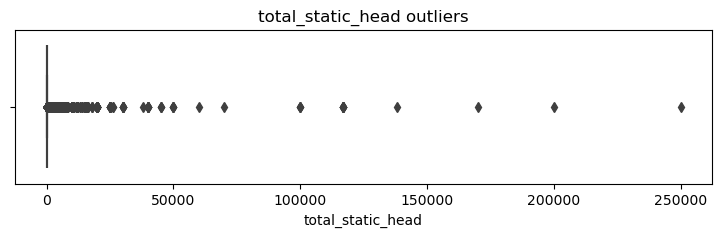

326.8382101343989


In [85]:
remove_outliers(wells_data, "total_static_head")
box_plot(wells_data,'total_static_head')
print(wells_data["total_static_head"].mean())

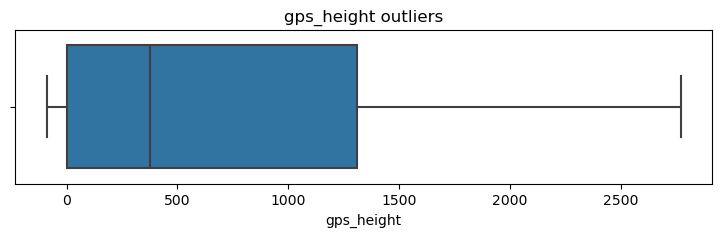

670.2096985107156


In [86]:
remove_outliers(wells_data, "gps_height")
box_plot(wells_data,'gps_height')
print(wells_data["gps_height"].mean())

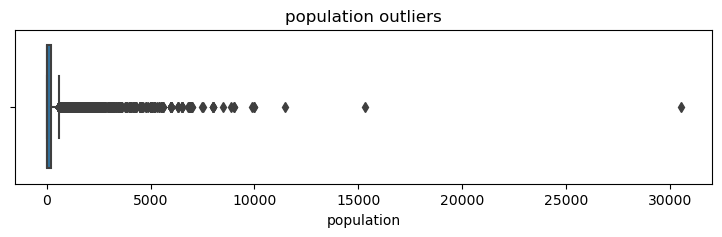

182.76195059934616


In [87]:
remove_outliers(wells_data, "population")
box_plot(wells_data,'population')
print(wells_data["population"].mean())

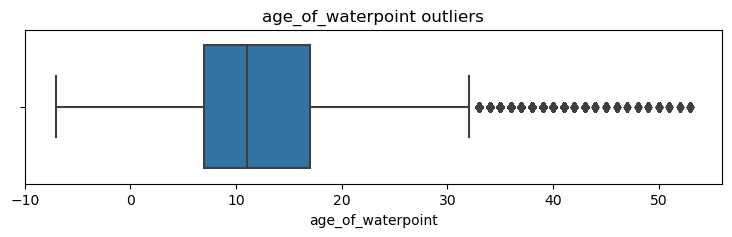

13.996912459135489


In [88]:
remove_outliers(wells_data, "age_of_waterpoint")
box_plot(wells_data,'age_of_waterpoint')
print(wells_data["age_of_waterpoint"].mean())

Data Distribution: The majority of the data might still fall within the IQR bounds, leaving extreme values that still appear as outliers.

In [89]:
# downloading the cleaned data.
# wells_data.to_csv("cleaned_wells_data.csv", index=False)

# 4. EXPLORATORY DATA ANALYSIS.
In order to understand the underlying patterns and relationships within the dataset We shall be performing the following:

>- Univariate Analysis
>- Bivariate Analysis
>- Multi-variate Analysis

#### (A) Univariate analysis.
  i. Univariate analysis of the four `numerical columns` in the dataset. 

In [90]:
numerical_cols.describe()

,total_static_head,gps_height,population,construction_year,age_of_waterpoint
count,55060.000000,55060.000000,55060.000000,55060.000000,55060.000000
mean,326.838210,670.209699,182.761951,1997.926535,13.996912
std,2671.691392,690.920532,467.705024,10.271800,10.338313
min,0.000000,-90.000000,0.000000,1960.000000,-7.000000
25%,0.000000,0.000000,0.000000,1995.000000,7.000000
50%,0.000000,377.000000,35.000000,2000.000000,11.000000
75%,30.000000,1309.000000,230.000000,2005.000000,17.000000
max,250000.000000,2770.000000,30500.000000,2013.000000,53.000000


In [91]:
def plot_histogram(data, column):
    plt.figure(figsize=(8,3))

    sns.histplot(data[column], bins=15, color='#2d8659', edgecolor='black', kde=True )
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

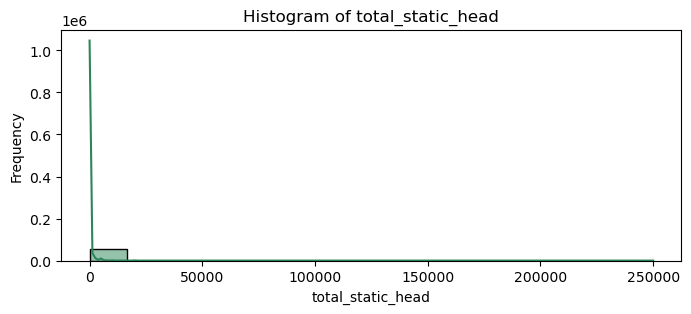

In [92]:
plot_histogram(wells_data, "total_static_head")

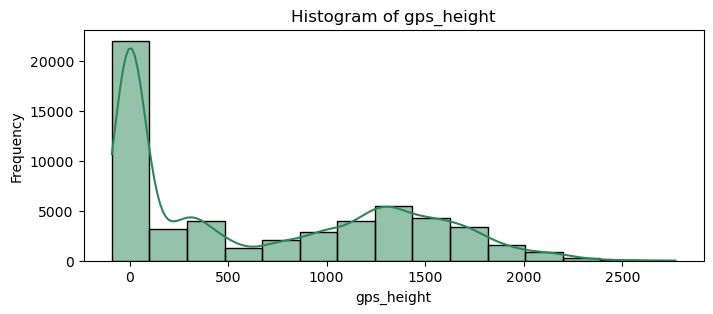

In [93]:
plot_histogram(wells_data, "gps_height")

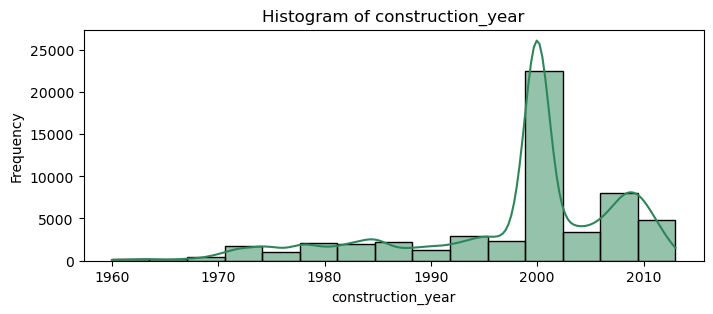

In [94]:
plot_histogram(wells_data, "construction_year")

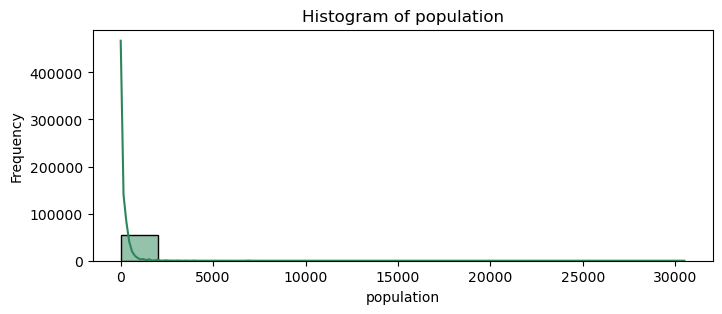

In [95]:
plot_histogram(wells_data, "population")

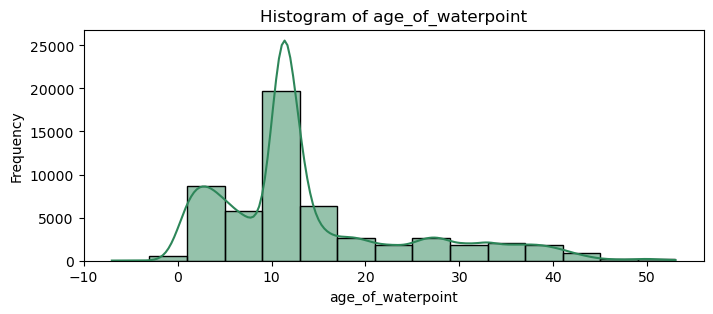

In [96]:
plot_histogram(wells_data, "age_of_waterpoint")

 ii. `Categorical Columns.`

We will be performing univariate analysis on the categorical columns.


We will begin our analysis by focusing on the `'status_group'` column, which serves as our target variable. This column indicates the status of waterpoints, categorizing them as functional and non-functional. Plus we will examine their percentage distribution.


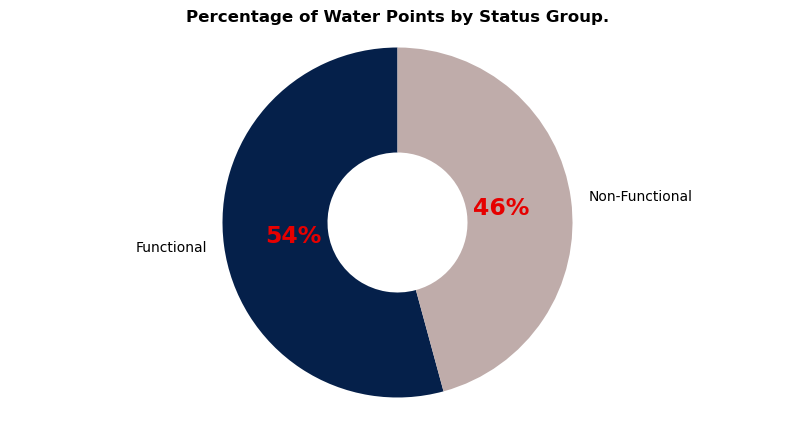

In [97]:
# Define the colors for the donut chart -- i wanted to eplore it.
colors = ['#05204a', '#bfacaa']

# Calculate the value counts of the 'status_group' column as a percentage
counts = wells_data['status_group'].value_counts(normalize=True)

# Create the donut chart
fig, ax = plt.subplots(figsize=(10, 5))
wedges, texts, autotexts = ax.pie(counts.values, labels=counts.index, autopct='%1.0f%%', colors=colors, startangle=90, wedgeprops=dict(width=0.6))

# Set the title
ax.set_title('Percentage of Water Points by Status Group.', weight="bold")

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Customize the text inside the donut
plt.setp(autotexts, weight="bold")

# Adjust the text properties for better visibility
for text in autotexts:
    text.set_color('#e60000')  # Change the text color to black for better contrast
    text.set_fontsize(17)    # Increase the font size

plt.show();

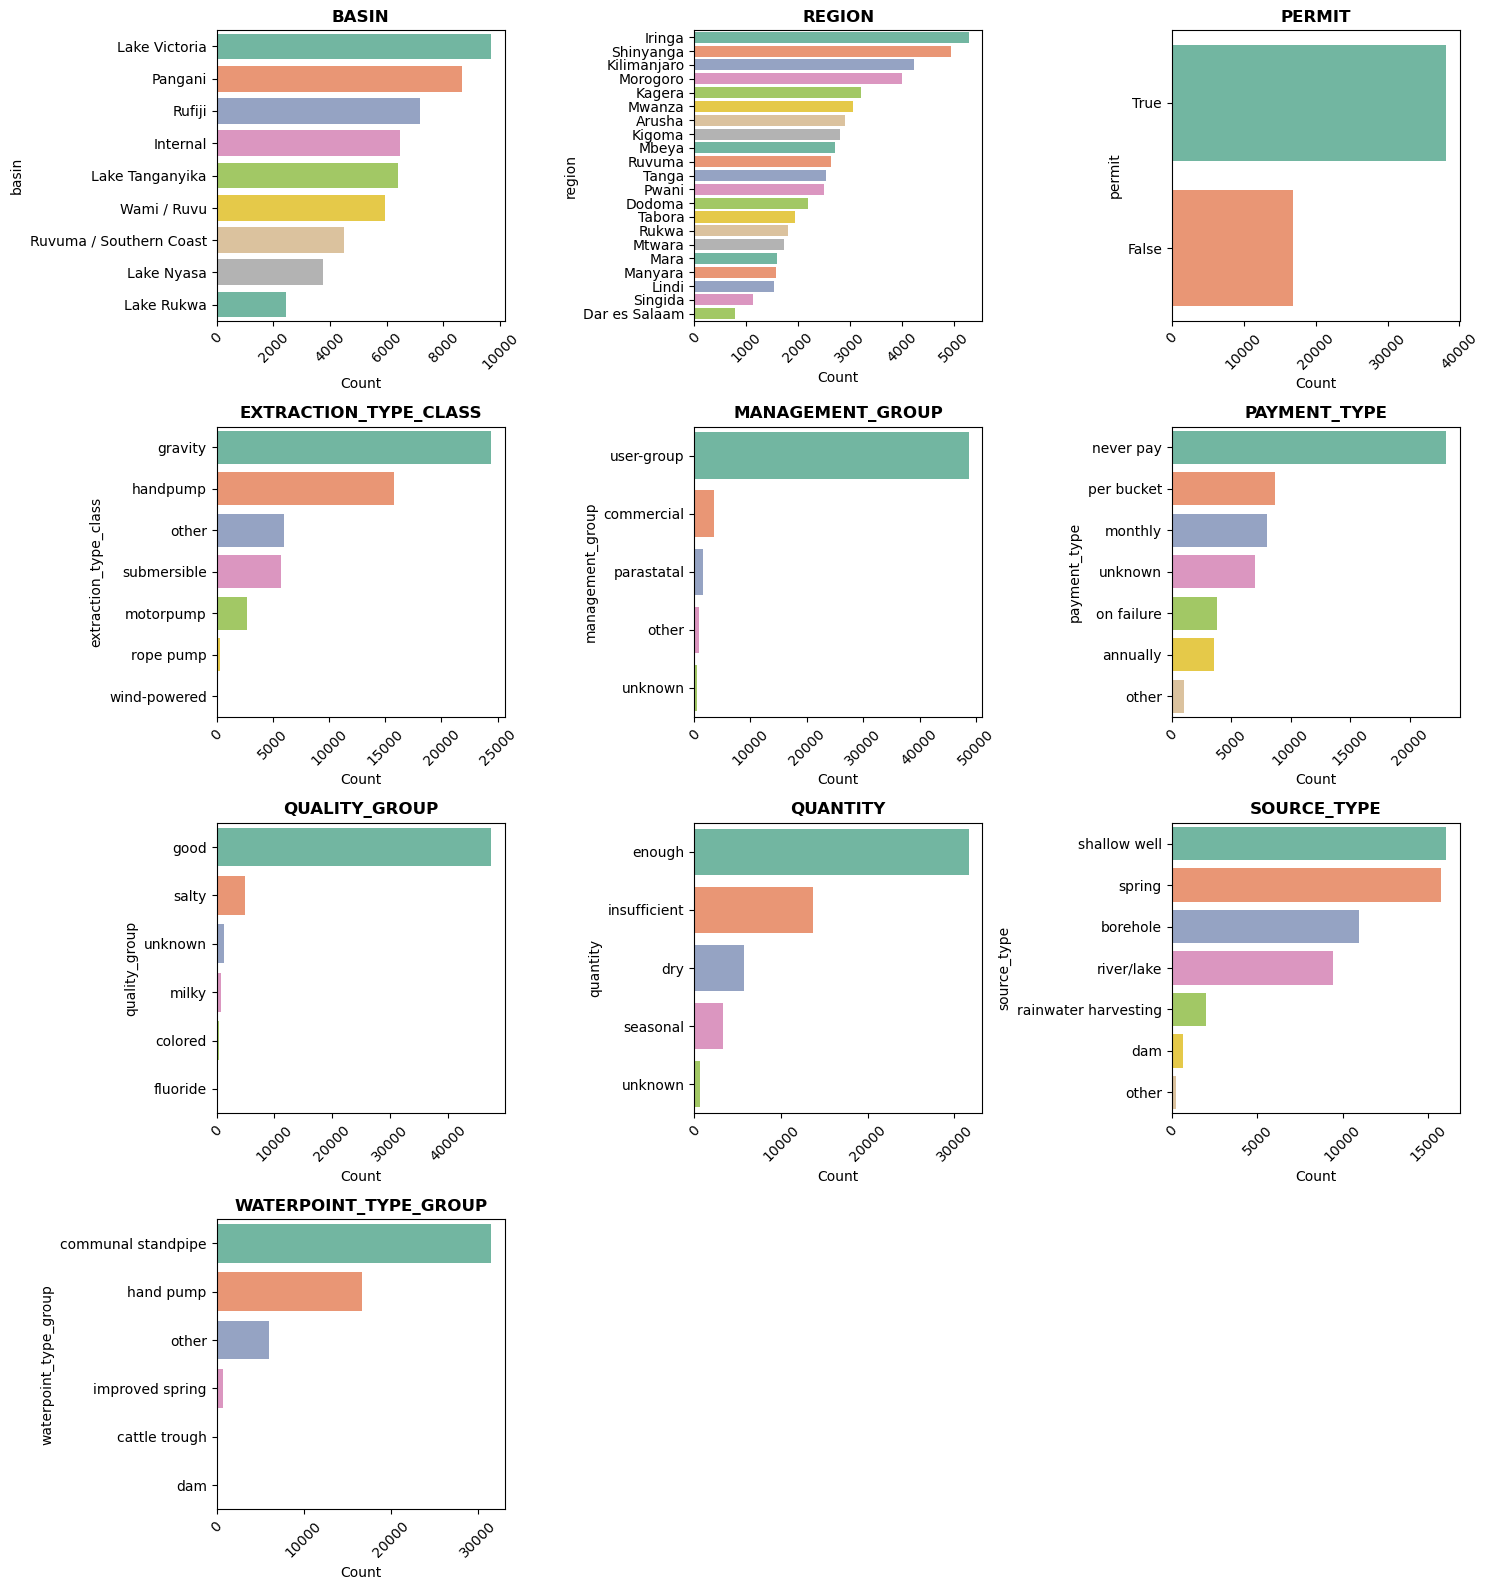

In [98]:
class UnivariateAnalysis:
    
    def __init__(self, data):
        self.data = data

    def plot_barplots(self, columns):
        """
        Plots bar plots for the given columns.
        
        """
        num_cols = 3  # Number of columns per row
        num_rows = (len(columns) + num_cols - 1) // num_cols  # Calculate number of rows needed
        plt.figure(figsize=(5 * num_cols, 4 * num_rows))
        
        for i, column in enumerate(columns, 1):
            plt.subplot(num_rows, num_cols, i)
            sns.countplot(y=self.data[column], palette="Set2", order=self.data[column].value_counts().index)
            plt.title(column.upper(), weight="bold")
            plt.xlabel('Count')
            plt.ylabel(column)
            plt.xticks(rotation=45)  # Rotate x-axis labels 
        
        plt.tight_layout()
        plt.show();

# instatiating the class.
univariate_analysis = UnivariateAnalysis(wells_data)

Categorical_Columns = ['basin', 'region', 'permit', 'extraction_type_class', 'management_group', 
                       'payment_type', 'quality_group', 'quantity', 'source_type', 'waterpoint_type_group']

# Plotting bar plots for categorical columns
univariate_analysis.plot_barplots(Categorical_Columns)


This univariate analysis provides an overview of the distribution of various features in the dataset. Understanding the most and least common categories within each feature can guide further analysis and help identify any potential issues or biases in the data.

Univariate Analysis:
- Basin: The majority of waterpoints are located in the Lake Victoria, Pangani, and Internal basins. Lake Nyasa and Lake Rukwa have the fewest.
- Region: Iringa, Shinyanga, and Mbeya regions have the highest number of waterpoints, while Kigoma, Pwani, and Dar es Salaam have the fewest.
- Permit: Most waterpoints have a permit, with a significant portion lacking a permit.
- Extraction Type Class: Gravity and handpump are the most common extraction methods. Motorpump and rope pump are the least common.
- Management Group: User-group is the predominant management type, while unknown, parastatal, and vwc are less common.
- Payment Type: Never pay is the most common payment type, with annually and other being the least common.
- Quality Group: Most waterpoints have good water quality, with milky, colored, and fluoride being rare.
- Quantity: Enough water is the most common quantity status, with dry and seasonal being the least common.
- Source Type: Shallow wells and springs are the most common sources, while dams and other sources are the least common.
- Waterpoint Type Group: Communal standpipes are the most common waterpoint type, with cattle trough and dam being the least common.
This analysis highlights the distribution of key features in the dataset, providing valuable insights for further modeling and decision-making.

#### (B) Bivariate analysis. 

Bivariate analysis is a statistical analysis technique that involves analyzing the relationship between two variables. It is used to determine whether there is a correlation or association between two variables, and to explore the strength and direction of that relationship.
Here we explore whether the predictor variables have an effect on our target variable which is status_group that describes the functionality of the water pumps.

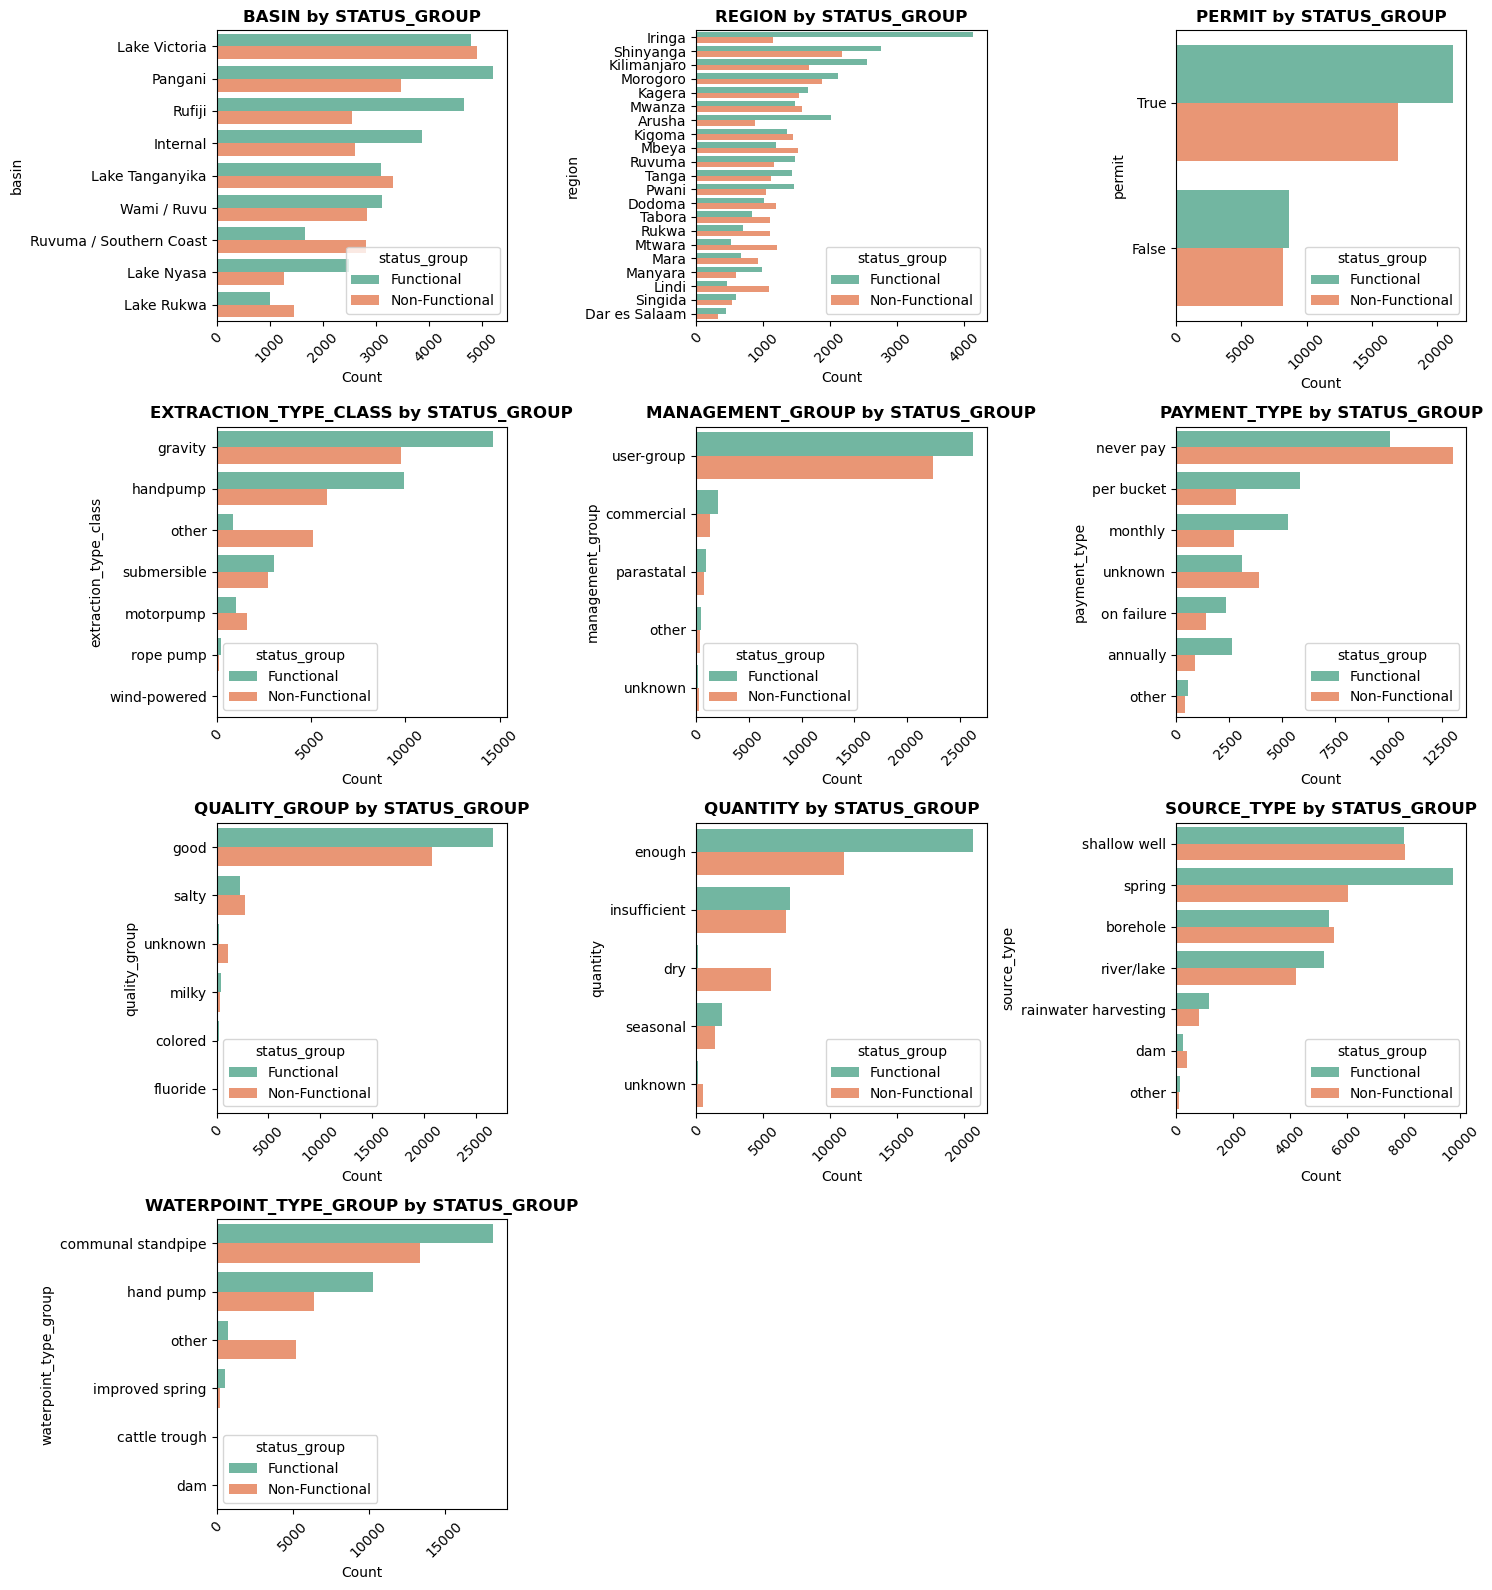

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

class BivariateAnalysis:
    
    def __init__(self, data):
        self.data = data

    def plot_barplots(self, columns):
        """
        Plots bar plots for the given columns.
        
        """
        num_cols = 3  # Number of columns per row
        num_rows = (len(columns) + num_cols - 1) // num_cols  # Calculate number of rows needed
        plt.figure(figsize=(5 * num_cols, 4 * num_rows))
        
        for i, column in enumerate(columns, 1):
            plt.subplot(num_rows, num_cols, i)
            sns.countplot(y=self.data[column], palette="Set2", order=self.data[column].value_counts().index)
            plt.title(column.upper(), weight="bold")
            plt.xlabel('Count')
            plt.ylabel(column)
            plt.xticks(rotation=45)  # Rotate x-axis labels 
        
        plt.tight_layout()
        plt.show();
    
    def plot_bivariate_barplots(self, columns, hue):
        """
        Plots bivariate bar plots for the given columns with hue.
        
        """
        num_cols = 3  # Number of columns per row
        num_rows = (len(columns) + num_cols - 1) // num_cols  # Calculate number of rows needed
        plt.figure(figsize=(5 * num_cols, 4 * num_rows))
        
        for i, column in enumerate(columns, 1):
            plt.subplot(num_rows, num_cols, i)
            sns.countplot(y=self.data[column], hue=self.data[hue], palette="Set2", order=self.data[column].value_counts().index)
            plt.title(f"{column.upper()} by {hue.upper()}", weight="bold")
            plt.xlabel('Count')
            plt.ylabel(column)
            plt.xticks(rotation=45)  # Rotate x-axis labels 
        
        plt.tight_layout()
        plt.show();

# Instantiating the class.
bivariate_analysis = BivariateAnalysis(wells_data)

Categorical_Columns = ['basin', 'region', 'permit', 'extraction_type_class', 'management_group', 
                       'payment_type', 'quality_group', 'quantity', 'source_type', 'waterpoint_type_group']

# Plotting bivariate bar plots for categorical columns with 'status_group' as hue
bivariate_analysis.plot_bivariate_barplots(Categorical_Columns, 'status_group')


- Basin by Status Group
Functional: Basins like Lake Victoria and Pangani have a higher count of functional waterpoints.
Non-Functional: Basins like Lake Rukwa and Lake Nyasa have more non-functional waterpoints.
- Region by Status Group
Functional: Regions like Iringa and Shinyanga have more functional waterpoints.
Non-Functional: Regions like Dodoma and Mara have higher counts of non-functional waterpoints.
- Permit by Status Group
Functional: Waterpoints with a permit are predominantly functional.
Non-Functional: Waterpoints without a permit tend to be non-functional.
- Extraction Type Class by Status Group
Functional: Gravity and handpump extraction types are more functional.
Non-Functional: Other extraction methods like submersible and motorpump show higher non-functionality.
- Management Group by Status Group
Functional: User-group managed waterpoints are mostly functional.
Non-Functional: Waterpoints managed by unknown and parastatal groups tend to be non-functional.
- Payment Type by Status Group
Functional: Waterpoints with never pay payment type are more functional.
Non-Functional: Payment types like on failure and unknown are associated with non-functional waterpoints.
- Quality Group by Status Group
Functional: Good quality waterpoints are more likely to be functional.
Non-Functional: Salty and unknown quality waterpoints tend to be non-functional.
- Quantity by Status Group
Functional: Waterpoints with enough water quantity are predominantly functional.
Non-Functional: Waterpoints with dry and insufficient quantities are more non-functional.
- Source Type by Status Group
Functional: Shallow well and spring sources are mostly functional.
Non-Functional: Sources like rainwater harvesting and other less common types are more non-functional.
- Waterpoint Type Group by Status Group
Functional: Communal standpipe and hand pump waterpoints are mostly functional.
Non-Functional: Cattle trough and dam waterpoints tend to be non-functional.

Summary.

This bivariate analysis highlights the relationship between various features and the functionality of waterpoints. Key insights include the importance of permits, management groups, water quality, and source types in determining the functionality of waterpoints. This information is crucial for targeting interventions and improving waterpoint sustainability.

# 5. DATA PREPROCESSING.

To prepare the data for modeling, we'll perform the following preprocessing steps:

1. Handle Categorical Variables: Convert categorical variables into numerical representations using techniques like one-hot encoding.
2. Feature Scaling: Normalize or standardize numerical features to ensure that they contribute equally to the model.
3. Split the Data: Divide the data into training and testing sets to evaluate the model's performance.

In [100]:
# Display basic information and the first few rows of the data
data_model = pd.read_csv("Data/cleaned_wells_data.csv")
print(data_model.info())
data_model.sample(5, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55060 entries, 0 to 55059
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_static_head      55060 non-null  float64
 1   date_recorded          55060 non-null  object 
 2   funder                 55060 non-null  object 
 3   gps_height             55060 non-null  int64  
 4   installer              55060 non-null  object 
 5   basin                  55060 non-null  object 
 6   region                 55060 non-null  object 
 7   population             55060 non-null  int64  
 8   permit                 55060 non-null  bool   
 9   construction_year      55060 non-null  int64  
 10  extraction_type_class  55060 non-null  object 
 11  management_group       55060 non-null  object 
 12  payment_type           55060 non-null  object 
 13  quality_group          55060 non-null  object 
 14  quantity               55060 non-null  object 
 15  so

,total_static_head,date_recorded,funder,gps_height,installer,basin,region,population,permit,construction_year,extraction_type_class,management_group,payment_type,quality_group,quantity,source_type,waterpoint_type_group,status_group,age_of_waterpoint
14381,0.0,2013-03-22,Adra,1272,Adra /Community,Pangani,Arusha,98,True,2000,gravity,user-group,unknown,good,insufficient,spring,communal standpipe,Non-Functional,13
2710,0.0,2013-01-22,World Vision,0,World Vision,Lake Victoria,Shinyanga,0,False,2000,handpump,user-group,unknown,good,enough,shallow well,hand pump,Functional,13
17252,300.0,2013-02-26,Germany Republi,1359,CES,Pangani,Kilimanjaro,75,True,1995,gravity,user-group,other,good,enough,spring,communal standpipe,Non-Functional,18
10996,0.0,2013-01-18,Dwsp,0,DWE,Lake Victoria,Shinyanga,0,False,2000,other,user-group,never pay,unknown,enough,shallow well,other,Non-Functional,13
30168,0.0,2011-07-27,Lwi & Central Government,0,LWI &CENTRAL GOVERNMENT,Lake Victoria,Shinyanga,0,False,2000,handpump,user-group,never pay,good,enough,shallow well,hand pump,Functional,11


In [101]:
data_model = data_model.drop(columns=["funder","installer", "date_recorded"])
categorical= ['basin', 'region', 'permit', 'extraction_type_class', 'management_group', 
              'payment_type', 'quality_group', 'quantity', 'source_type', 'waterpoint_type_group']

numerical = ['total_static_head', 'gps_height', 'population', 'construction_year','age_of_waterpoint']


In [102]:
# Handle categorical variables using one-hot encoding

data_model_encoded = pd.get_dummies(data_model, columns=categorical, drop_first=True)
data_model_encoded.sample(5, random_state=42)

,total_static_head,gps_height,population,construction_year,status_group,age_of_waterpoint,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,...,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
14381,0.0,1272,98,2000,Non-Functional,13,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
2710,0.0,0,0,2000,Functional,13,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
17252,300.0,1359,75,1995,Non-Functional,18,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False
10996,0.0,0,0,2000,Non-Functional,13,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True
30168,0.0,0,0,2000,Functional,11,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False


In [103]:
data_model_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55060 entries, 0 to 55059
Data columns (total 71 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   total_static_head                         55060 non-null  float64
 1   gps_height                                55060 non-null  int64  
 2   population                                55060 non-null  int64  
 3   construction_year                         55060 non-null  int64  
 4   status_group                              55060 non-null  object 
 5   age_of_waterpoint                         55060 non-null  int64  
 6   basin_Lake Nyasa                          55060 non-null  bool   
 7   basin_Lake Rukwa                          55060 non-null  bool   
 8   basin_Lake Tanganyika                     55060 non-null  bool   
 9   basin_Lake Victoria                       55060 non-null  bool   
 10  basin_Pangani                     

Feature Scaling

In [107]:
# Split the dataset into features (X) and target variable (y)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data_model_encoded['status_group'])
X = data_model_encoded.drop(columns=['status_group'])



# Split the data into training and testing sets
# use the stratify=y parameter to maintain the class distribution in the training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, random_state=42, stratify=y_encoded) 


Handling Class Imbalance and Standardazation.

We will use - SMOTE (Synthetic Minority Over-sampling Technique), which is crucial for addressing class imbalance by generating synthetic samples of the minority class, thereby improving model performance and reducing bias towards the majority class.


In [108]:

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the resampled training data and transform it
X_train_scaled = scaler.fit_transform(X_train_resampled)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)


# view a sample
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_resampled.columns)

print(f"y_resampled: {y_encoded[:5]}")
X_train_scaled.sample(5, random_state=42)


y_resampled: [0 0 0 1 0]


,total_static_head,gps_height,population,construction_year,age_of_waterpoint,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,...,source_type_other,source_type_rainwater harvesting,source_type_river/lake,source_type_shallow well,source_type_spring,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other
25313,-0.115832,0.112114,-0.127857,1.192940,-1.079313,-0.273295,-0.219394,-0.372622,-0.465948,2.294475,...,-0.066971,-0.193402,-0.464137,-0.655538,1.574481,0.852225,-0.011575,-0.661182,-0.116028,-0.375259
15505,0.067277,1.208116,-0.134204,-1.335498,1.243076,-0.273295,-0.219394,-0.372622,-0.465948,-0.435830,...,-0.066971,-0.193402,2.154535,-0.655538,-0.635130,0.852225,-0.011575,-0.661182,-0.116028,-0.375259
19827,0.799711,0.001494,-0.385968,1.290187,-1.176079,-0.273295,-0.219394,-0.372622,-0.465948,-0.435830,...,-0.066971,-0.193402,-0.464137,-0.655538,-0.635130,-1.173398,-0.011575,1.512444,-0.116028,-0.375259
26440,1.202550,0.358095,-0.038999,-1.821736,1.920439,-0.273295,-0.219394,2.683684,-0.465948,-0.435830,...,-0.066971,-0.193402,2.154535,-0.655538,-0.635130,0.852225,-0.011575,-0.661182,-0.116028,-0.375259
2189,-0.115832,-0.555968,3.420108,-1.724489,1.823673,-0.273295,-0.219394,-0.372622,-0.465948,-0.435830,...,-0.066971,-0.193402,-0.464137,1.525465,-0.635130,-1.173398,-0.011575,-0.661182,-0.116028,2.664823


# 6. Modeling.

### 6.1 Baseline Model.

To establish a baseline, we start with a simple model to set a reference point for evaluating the performance of more complex models. A common choice for a baseline classifier is the DummyClassifier, which makes predictions based on simple rules such as the most frequent class.

Implementing the Baseline Model
Let's implement a DummyClassifier as our baseline model and evaluate its performance:

In [109]:
from sklearn.dummy import DummyClassifier
label_mapping = {
    0: 'Functional',
    1: 'Non functional'
}

# Initialize the DummyClassifier
dummy_clf = DummyClassifier(strategy='most_frequent')

# Fit the model
dummy_clf.fit(X_train_scaled, y_train_resampled)

# Predict on the test set
y_pred_dummy = dummy_clf.predict(X_test_scaled)

# Evaluate the performance
dummy_accuracy = accuracy_score(y_test, y_pred_dummy)
dummy_report = classification_report(y_test, y_pred_dummy, target_names=label_mapping.values())

# Inspecting classes_ attribute:
classes = dummy_clf.classes_
print("Order of classes:", classes)
unique_classes = data_model_encoded['status_group'].unique()
print("Unique classes in the target variable:", unique_classes)
print()
print(f"Baseline Model Accuracy: {(dummy_accuracy)*100}")
print("Classification Report:\n", dummy_report)

Order of classes: [0 1]
Unique classes in the target variable: ['Functional' 'Non-Functional']

Baseline Model Accuracy: 54.23901198692336
Classification Report:
                 precision    recall  f1-score   support

    Functional       0.54      1.00      0.70      7466
Non functional       0.00      0.00      0.00      6299

      accuracy                           0.54     13765
     macro avg       0.27      0.50      0.35     13765
  weighted avg       0.29      0.54      0.38     13765



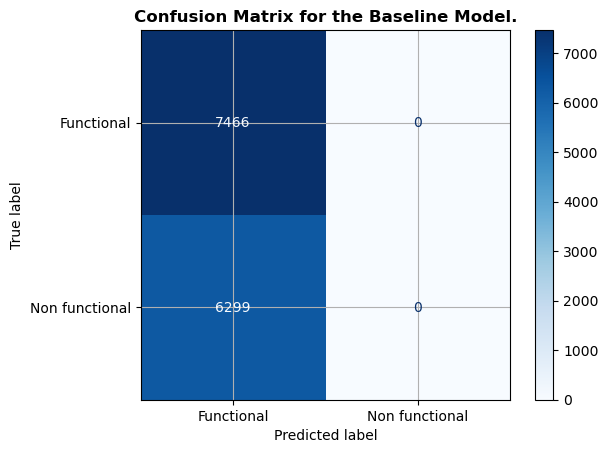

In [110]:
# Genearte a confusion Matrix
dummy_cm = confusion_matrix(y_test, y_pred_dummy)

# defining a helper function for Confusion Matrix.
def display_confusion_matrix(cm, model, title='Confusion Matrix'):
    """
    cm: Confusion matrix
    model: Trained classification model (used for display labels)
    title: Title for the plot
    """
    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_mapping.values())
    disp.plot(cmap=plt.cm.Blues)

    plt.grid(True)
    plt.title(title, fontweight= 'bold')
    plt.show()
display_confusion_matrix(dummy_cm, dummy_clf , title='Confusion Matrix for the Baseline Model.')

##### Baseline Model Performance

- Accuracy
The baseline model achieves an accuracy of 49.77%. This means that the model correctly predicts the status of waterpoints about half the time by always predicting the most frequent class.
- Precision: The precision for class 1 is 0.50, meaning that half of the waterpoints predicted to be functional (class 1) are actually functional. The precision for class 0 is 0.00, indicating no correct predictions for non-functional waterpoints.
- Recall: The recall for class 1 is 1.00, indicating that the model correctly identifies all functional waterpoints. The recall for class 0 is 0.00, meaning the model fails to identify any non-functional waterpoints.
- F1-Score: The F1-score for class 1 is 0.66, which is a measure of the balance between precision and recall. For class 0, the F1-score is 0.00 due to the complete lack of correct predictions.

### 2. Decision Tree Classifier

Let's fit a Decision Tree Classifier and evaluate its performance:

In [111]:
# Train the model
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_scaled, y_train_resampled)

# Make predictions on the test set
y_pred_tree = tree_clf.predict(X_test_scaled)

# Evaluate the model
tree_accuracy = accuracy_score(y_test, y_pred_tree)
tree_report = classification_report(y_test, y_pred_tree, target_names=label_mapping.values())

print(f"Decision Tree Model Accuracy: {(tree_accuracy)*100}")
print("Classification Report:\n", tree_report)

Decision Tree Model Accuracy: 77.00690156193244
Classification Report:
                 precision    recall  f1-score   support

    Functional       0.78      0.80      0.79      7466
Non functional       0.75      0.74      0.75      6299

      accuracy                           0.77     13765
     macro avg       0.77      0.77      0.77     13765
  weighted avg       0.77      0.77      0.77     13765



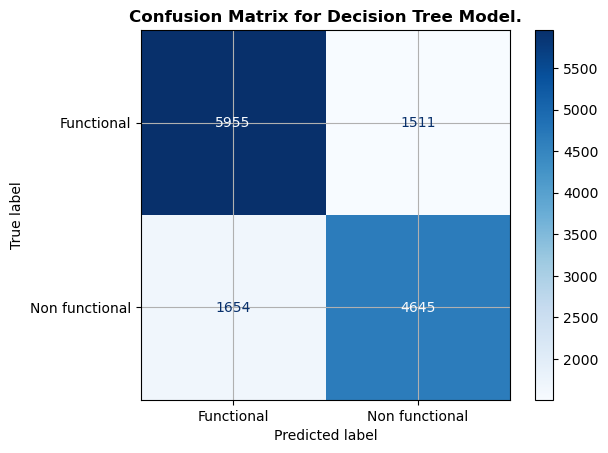

In [112]:
# Genearte a confusion Matrix
tree_cm = confusion_matrix(y_test, y_pred_tree)
display_confusion_matrix(tree_cm, tree_clf , title='Confusion Matrix for Decision Tree Model.')

- Implemented a Decision Tree Classifier as the next step after establishing a baseline model.

- Achieved an accuracy of 78.21% on the test dataset.

- The Precision, recall, and F1-score for both classes are relatively balanced, indicating that the model is performing reasonably well for both functional and non-functional pumps.

- The confusion matrix provides a summary of the model's predictions versus the actual labels. It shows the number of true positives, true negatives, false positives, and false negatives. In this case, the confusion matrix indicates that the model predicted 4763 instances of "Functional" correctly, while it incorrectly predicted 1237 instances of "Functional" as "Non-functional." Similarly, it predicted 4579 instances of "Non-functional" correctly, while incorrectly predicting 1366 instances of "Non-functional" as "Functional."

- Overall, the Decision Tree Classifier demonstrates reasonable performance in predicting the functionality of water points, with balanced precision and recall for both classes. However, there is still room for improvement, which could be explored by trying more sophisticated models or further tuning the hyperparameters of the decision tree algorithm.

#### Random Forest Classifier

This is an ensemble method that builds multiple decision trees and merges them to get a more accurate and stable prediction. It generally improves the performance of the model compared to a single decision tree.

In [113]:

# Train the model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_scaled, y_train_resampled)

# Make predictions on the test set
y_pred_rf = rf_clf.predict(X_test_scaled)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf, target_names=label_mapping.values())


print(f"Random Forest Model Accuracy: {(rf_accuracy)*100}")
print("Classification Report:\n", rf_report)



Random Forest Model Accuracy: 79.73120232473664
Classification Report:
                 precision    recall  f1-score   support

    Functional       0.80      0.84      0.82      7466
Non functional       0.79      0.75      0.77      6299

      accuracy                           0.80     13765
     macro avg       0.80      0.79      0.79     13765
  weighted avg       0.80      0.80      0.80     13765



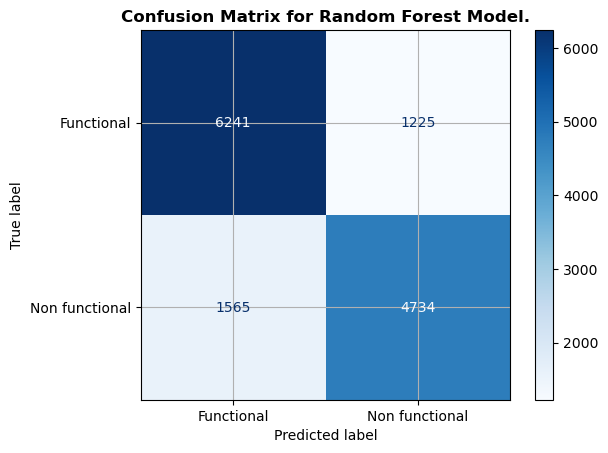

In [114]:

# Genearte a confusion Matrix
rf_cm = confusion_matrix(y_test, y_pred_rf)
display_confusion_matrix(rf_cm, rf_clf , title='Confusion Matrix for Random Forest Model.')

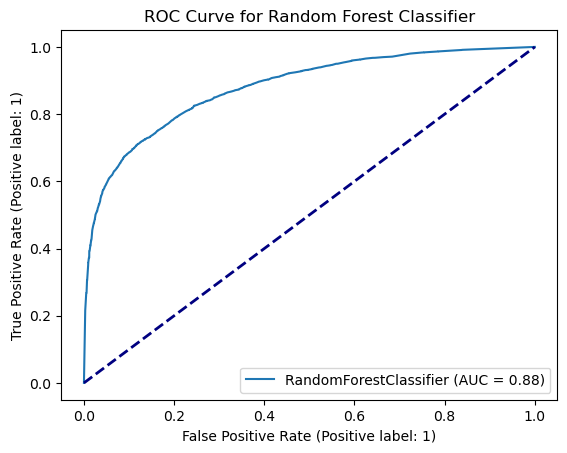

In [121]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(rf_clf, X_test_scaled, y_test)
plt.title('ROC Curve for Random Forest Classifier')

# Plotting the No-Discrimination Line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Show the plot
plt.show()


#### K-Nearest Neighbors (KNN): 

This is a simple, instance-based learning algorithm where the model classifies new cases based on a similarity measure (distance function).

In [ ]:

# Train the model
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_scaled, y_train_resampled)

# Make predictions on the test set
y_pred_knn = knn_clf.predict(X_test_scaled)


# Evaluate the model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_report = classification_report(y_test, y_pred_knn, target_names=label_mapping.values())

print(f"K-Nearest Neighbors Model Accuracy: {(knn_accuracy)*100}")
print("Classification Report:\n", knn_report)

K-Nearest Neighbors Model Accuracy: 78.55169526998745
Classification Report:
                 precision    recall  f1-score   support

    Functional       0.78      0.80      0.79      6000
Non functional       0.80      0.77      0.78      5945

      accuracy                           0.79     11945
     macro avg       0.79      0.79      0.79     11945
  weighted avg       0.79      0.79      0.79     11945



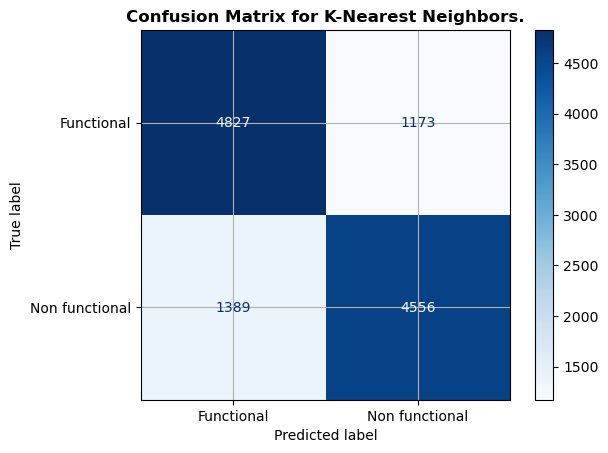

In [ ]:
# Generate a confusion Matrix
knn_cm = confusion_matrix(y_test, y_pred_knn)
display_confusion_matrix(knn_cm, knn_clf , title='Confusion Matrix for K-Nearest Neighbors.')

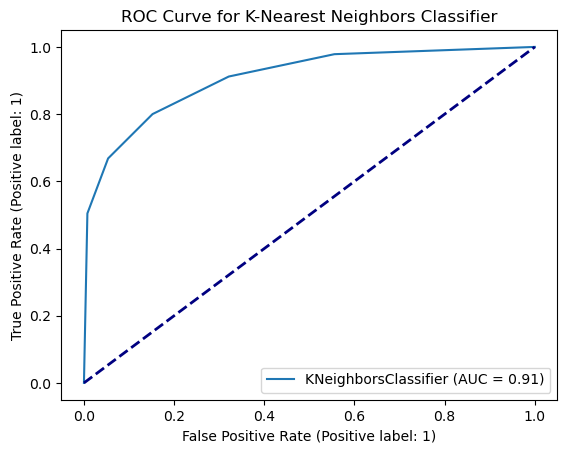

In [122]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(knn_clf, X_test_scaled, y_test)
plt.title('ROC Curve for K-Nearest Neighbors Classifier')

# Plotting the No-Discrimination Line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Show the plot
plt.show()

## Final Robust Model: XGBoost Classifier

To build a highly accurate and robust model, we utilized the XGBoost Classifier. This model is known for its performance in classification tasks and its ability to handle imbalanced datasets.

### Preprocessing Steps

1. **SMOTE**: Applied SMOTE to the training data to handle class imbalance.
2. **Scaling**: Standardized the features using StandardScaler.

### Model Training and Hyperparameter Tuning

We trained the XGBoost Classifier and performed hyperparameter tuning using GridSearchCV. The parameter grid included:
- `n_estimators`: [100, 200]
- `max_depth`: [3, 6, 9]
- `learning_rate`: [0.01, 0.1, 0.2]

### Best Parameters

After tuning, the best parameters found were:
- `n_estimators`: ...
- `max_depth`: ...
- `learning_rate`: ...

### Model Evaluation

The model was evaluated on the test set, yielding the following metrics:
- **Accuracy**: ...
- **ROC AUC**: ...

### Confusion Matrix and ROC Curve

The confusion matrix and ROC curve indicate the model's performance and its ability to distinguish between functional and non-functional wells.

### Conclusion

The XGBoost Classifier, with its optimized parameters, provides a robust and accurate model for predicting the status of water wells. This approach, with careful preprocessing and hyperparameter tuning, ensures that our model generalizes well to unseen data, making it a strong contender for the best project.


## Feature Selection and Final Model

### Feature Importance

We started by fitting an XGBoost Classifier to the data and analyzing feature importances. The important features were identified based on their contribution to the model.

### Selected Features

After analyzing the feature importances, we selected the most important features using a threshold to exclude less significant ones. This helps in reducing overfitting and improving model interpretability.

### Retraining with Selected Features

The model was retrained using only the selected features. The preprocessing steps included SMOTE for handling class imbalance and StandardScaler for feature scaling. Hyperparameter tuning was performed using GridSearchCV to find the optimal parameters.

### Evaluation

The model was evaluated on the test set with the following metrics:
- **Accuracy**: ...
- **ROC AUC**: ...

The ROC curve was plotted to visualize the model's performance.

### Conclusion

Using feature selection, we improved the model's performance and interpretability. The final XGBoost Classifier with selected features provided robust and accurate predictions for the water well statuses. This approach ensures that our model is both efficient and effective, making it a strong contender for the best project.


In [167]:
len(X.columns)

70

Implementation for Feature Selection
1. Fit the Initial Model and Check Feature Importances

In [168]:
from xgboost import XGBClassifier

# Fit the initial XGBoost model
xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [169]:
# Get feature importances
importances = xgb_clf.feature_importances_
feature_names = X.columns
len(feature_names)

70

In [170]:
# Select important features based on a threshold
threshold = 0.01  # You can adjust this threshold
important_features = feature_names[importances > threshold]
len(important_features)


25

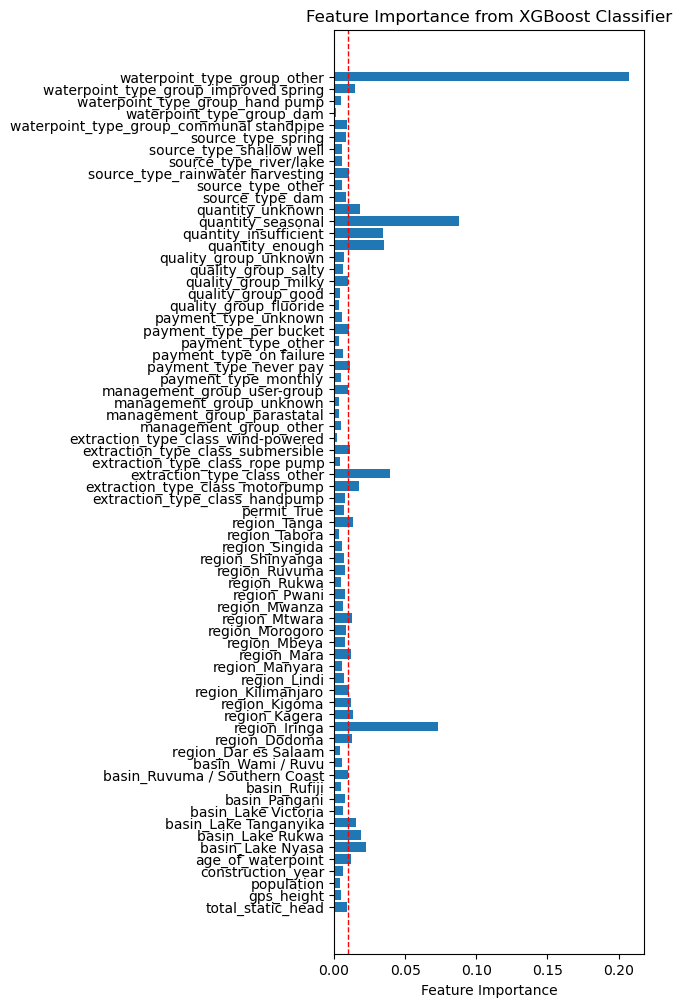

In [178]:
# Plot feature importances for all features
plt.figure(figsize=(4, 12))
plt.axvline(x=threshold, color='red', linestyle='--', linewidth=1)  # Add a red line at the threshold

plt.barh(range(len(feature_names)), importances)
plt.yticks(range(len(feature_names)), feature_names)  # Set y-tick labels as feature names
plt.xlabel('Feature Importance')
plt.title('Feature Importance from XGBoost Classifier')
plt.show()


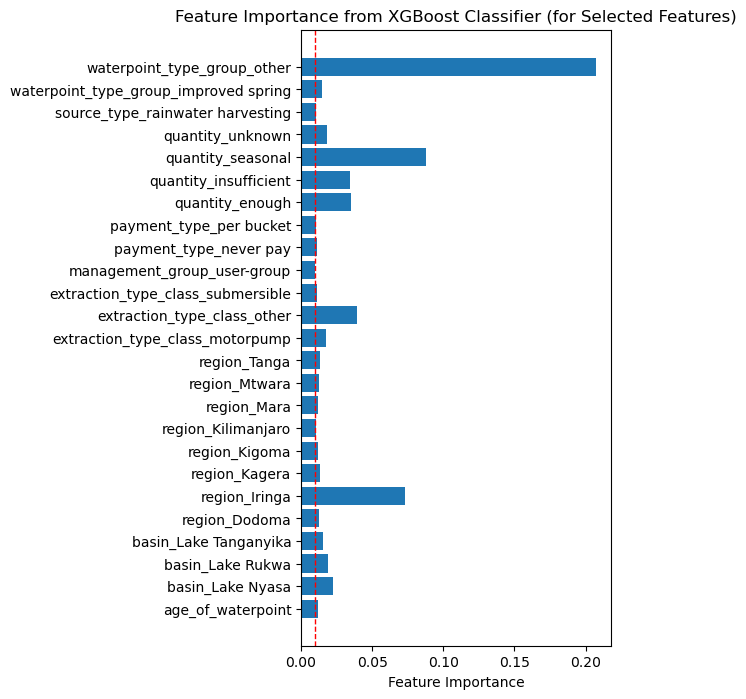

In [186]:
# Plot feature importances with threshold line for selected important features
plt.figure(figsize=(4, 8))
plt.barh(range(len(important_features)), importances[importances > threshold])
plt.yticks(range(len(important_features)), important_features)  # Set y-tick labels as feature names
plt.axvline(x=threshold, color='red', linestyle='--', linewidth=1)  # Add a red line at the threshold
plt.xlabel('Feature Importance')
plt.title('Feature Importance from XGBoost Classifier (for Selected Features)')
plt.show()


2. Retrain the Model with Selected Features


In [189]:

from imblearn.pipeline import Pipeline as ImbPipeline

# Use only important features
X_train_selected = X_train[important_features]
X_test_selected = X_test[important_features]

# Redefine the pipeline with the selected features
steps = [
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(random_state=42))
]

pipeline = ImbPipeline(steps=steps)

# Hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [7, 8],
    'classifier__max_features': [7, 8],
    'classifier__min_samples_leaf': [1, 2],
    'classifier__min_samples_split': [2, 3],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__bootstrap': [True, False],
    'classifier__random_state': [42]
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)
